<a href="https://colab.research.google.com/github/JesseHenson/School/blob/main/mod5_opt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from skimage import io 
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt



image = io.imread("https://store.prod.carolina.com/images/teacher-resources/items/large/latent-fingerprint.jpg")

In [3]:
bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

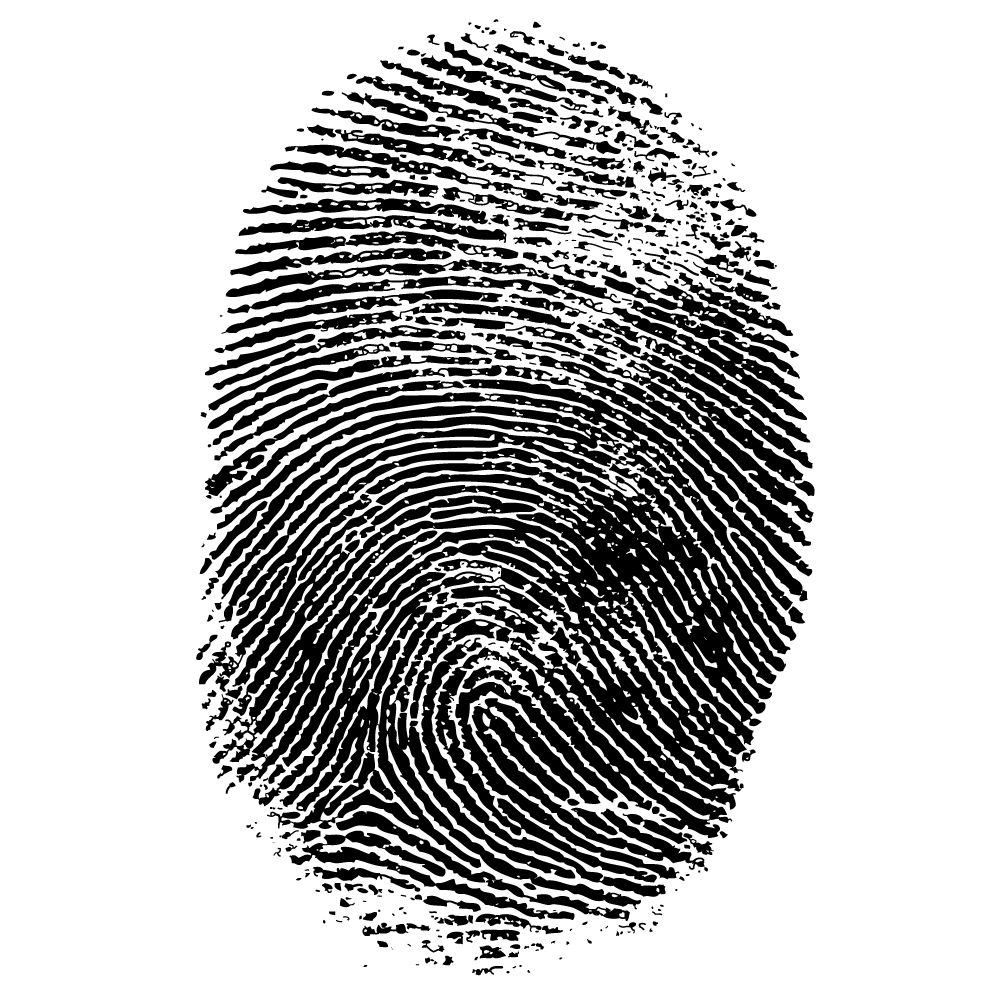

In [4]:
cv2_imshow(bgr_image)

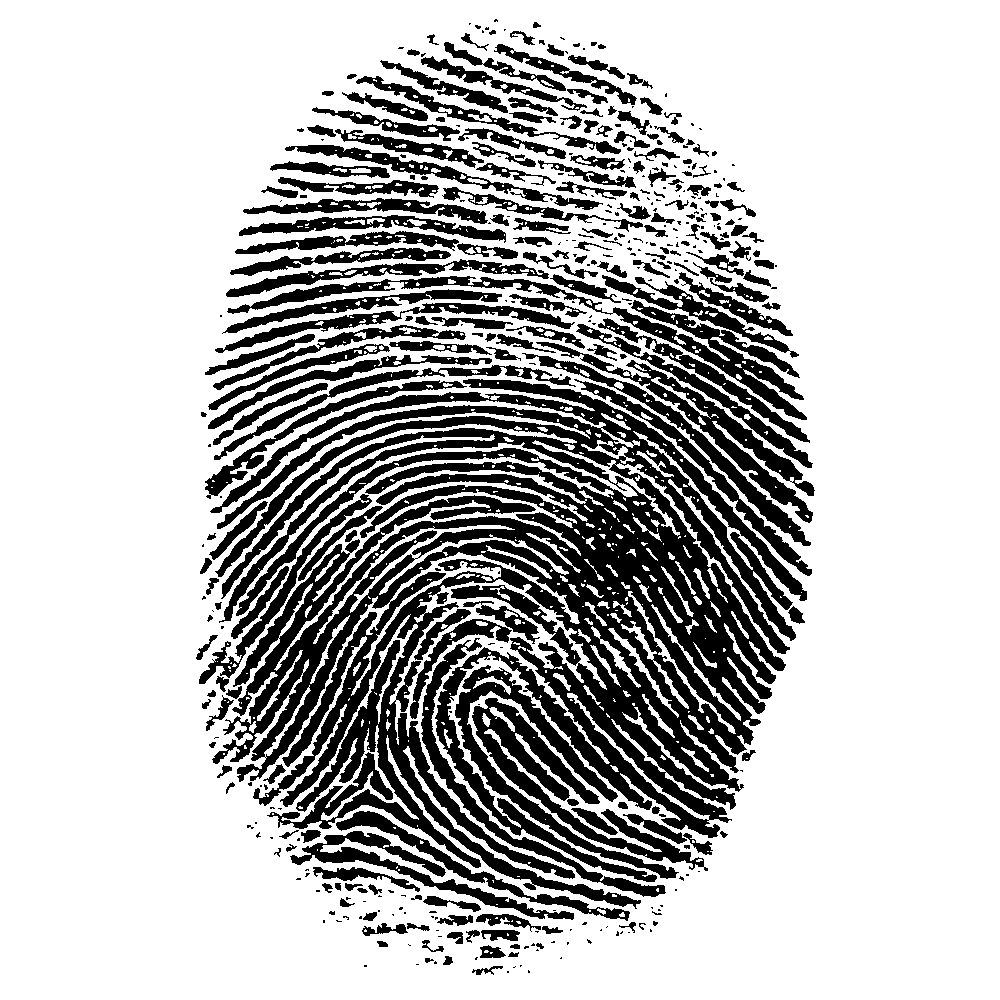

In [5]:
ret, binary_img = cv2.threshold(bgr_image,127,255,cv2.THRESH_BINARY)
cv2_imshow(binary_img)

In [6]:
binary_img.shape

(1000, 1000, 3)

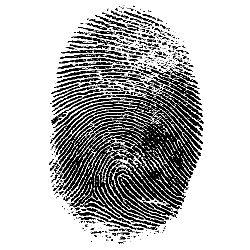

In [7]:
small_img = cv2.resize(binary_img, (250,250))
cv2_imshow(small_img)

In [11]:
kernel_size = 3
kernel = np.ones((kernel_size,kernel_size),np.uint8)
erosion = cv2.erode(binary_img,kernel,iterations = 1)
dilation = cv2.dilate(binary_img,kernel,iterations = 1)
opening = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

image_dict = {"original":small_img,"eroded":erosion,"dilation":dilation,"open":opening,"close":closing}

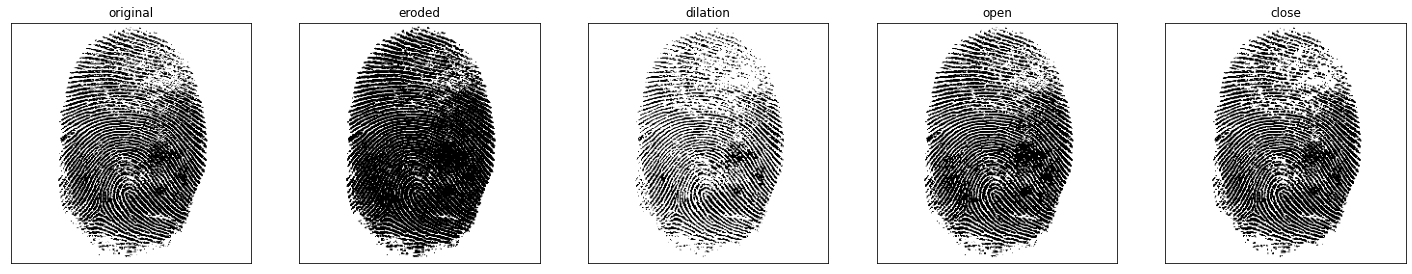

In [12]:
fig = plt.figure(figsize=(25,15))
count = 1

for key, value in image_dict.items():
  small_val = cv2.resize(value, (250,250))
  ax = fig.add_subplot(1,5, count)
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
  plt.imshow(small_val)
  plt.title(key)
  count += 1